# Project : The price fluctuations of bitcoin

### (1) Loading local file into python environment

We have already excuted `Bitcoin_1_Download_Data.ipynb` file, and we have a `Bitcoin_data.csv` file under current path. Let's load the data into python environment:

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("./Bitcoin_data.csv")
df.head()

,date,price,supply,capital,trade,wiki
0,2017-05-02,1452.076288,16307212.5,2.367932e+10,8.630647e+07,17143
1,2017-05-03,1507.576857,16308862.5,2.458686e+10,9.876808e+07,17277
2,2017-05-04,1508.292125,16310962.5,2.460170e+10,1.786810e+08,19238
3,2017-05-05,1533.335071,16312575.0,2.501264e+10,1.366548e+08,16900
4,2017-05-06,1560.410200,16314675.0,2.545759e+10,6.890728e+07,17793


Now, we first generate the interpreted variable, `y`, from the `price` attribute of dataframe `df`. We map the current price of bitcoin into a binary variable, 1 for 'going up' and -1 for 'going down', compared with the previous price. 

Also, we extract the explanary variables from dataframe `df`, and store them into a numpy array.

In [2]:
y = df.price
y = y.diff().diff()
y[y >= 0] = 1
y[y < 0] = -1
y = y.values[2:len(y)-1]

attr1 = 'trade'
attr2 = 'wiki'

X = df.loc[2:,[attr1, attr2]]

### (2) Let's find some interesting information

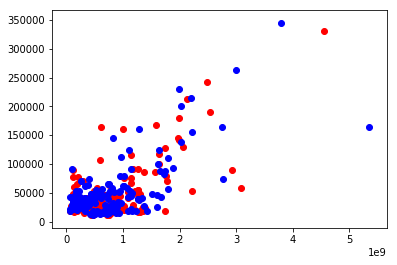

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X.loc[y>=0, attr1].values, X.loc[y>=0, attr2].values, c = 'r')
plt.scatter(X.loc[y<0, attr1].values, X.loc[y<0, attr2].values, c = 'b')
plt.show()

# It seems we are in trouble in predicting the price functuation !!!!